In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *

In [200]:
df1 = pd.read_csv('ICE.BRN_190601_200601.csv', delimiter = ',')
df1.describe()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
count,5.802000e+03,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000
mean,2.019477e+07,120966.907963,54.219905,54.413704,54.008456,54.214723,7480.912616
std,4.630813e+03,67501.365519,13.795760,13.738717,13.849829,13.795064,8378.006677
min,2.019060e+07,0.000000,16.250000,16.900000,15.980000,16.280000,1.000000
25%,2.019083e+07,70000.000000,52.190000,52.427500,51.982500,52.167500,1257.000000
50%,2.019113e+07,120000.000000,60.340000,60.490000,60.120000,60.330000,4588.000000
75%,2.020023e+07,180000.000000,63.370000,63.530000,63.210000,63.370000,11130.500000
max,2.020060e+07,230000.000000,71.220000,71.950000,70.410000,70.590000,89202.000000


In [244]:
df2 = df1.drop(['<DATE>', '<TIME>', '<HIGH>', '<LOW>', '<OPEN>'], axis = 1)
df2

,<CLOSE>,<VOL>
0,61.76,338
1,59.85,669
2,60.35,149
3,60.10,420
4,60.20,2591
...,...,...
5797,37.95,5632
5798,38.11,7129
5799,38.51,18794
5800,38.61,4179


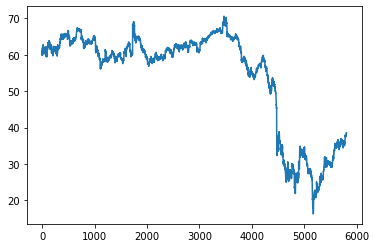

In [245]:
plt.plot(df2['<CLOSE>'])
plt.show()

In [247]:
count = 2
for i in range(count):
    df2['Lag%s' % str(i + 1)] = df1['<CLOSE>'].shift(i + 1)

df2

,<CLOSE>,<VOL>,Lag1,Lag2
0,61.76,338,NaN,NaN
1,59.85,669,61.76,NaN
2,60.35,149,59.85,61.76
3,60.10,420,60.35,59.85
4,60.20,2591,60.10,60.35
...,...,...,...,...
5797,37.95,5632,37.64,37.58
5798,38.11,7129,37.95,37.64
5799,38.51,18794,38.11,37.95
5800,38.61,4179,38.51,38.11


In [259]:
df3 = pd.DataFrame(index = df2.index)
df3['<VOL>'] = df2['<VOL>']
df3['<CLOSE>'] = df2['<CLOSE>'].pct_change() * 100
df3['<DIRECTION>'] = np.sign(df3['<CLOSE>'])
for i in range(count):
    df3['Lag%s' % str(i + 1)] = df2['Lag%s' % str(i + 1)].pct_change() * 100.0
    
df3 = df3[count + 1 :]

In [260]:
data = pd.DataFrame(index = df3.index)
data['<VOL>'] = df3['<VOL>']
data['<CLOSE>'] = np.array([0.0001 if abs(x) < 0.0001 else x for x in df3['<CLOSE>']])

data['<DIRECTION>'] = df3['<DIRECTION>']

for i in range(count):
    data['Lag%s' % str(i + 1)] = df2['Lag%s' % str(i + 1)]

data

,<VOL>,<CLOSE>,<DIRECTION>,Lag1,Lag2
3,420,-0.414250,-1.0,60.35,59.85
4,2591,0.166389,1.0,60.10,60.35
5,303,0.315615,1.0,60.20,60.10
6,601,-0.099354,-1.0,60.39,60.20
7,3222,0.629869,1.0,60.33,60.39
...,...,...,...,...,...
5797,5632,0.823592,1.0,37.64,37.58
5798,7129,0.421607,1.0,37.95,37.64
5799,18794,1.049593,1.0,38.11,37.95
5800,4179,0.259673,1.0,38.51,38.11


In [268]:
features = ['Lag1', 'Lag2']
directions = ['<DIRECTION>']
X = data[features].values
Y = np.array([[1 if dir == True else -1] for dir in data[directions].values])

trainX, testX, trainY, testY = model_selection.train_test_split(
    X, Y, test_size = 0.01, random_state = 0)

In [264]:
model = tree.DecisionTreeClassifier(max_depth = 30)
model = model.fit(trainX, trainY)

prediction = model.predict(testX)
print("Accuracy:", model.score(testX, testY))

Accuracy: 0.5517241379310345


In [274]:
good, bad = 0, 0
for i,j in zip(prediction, testY):
    if i == j:
        good += 1
    else:
        bad += 1
print(good)
print(bad)

32
26
